# Alternatives to d20

Usually, we roll a 20 sided die to check for success or failure. Here, I'll consider some alternatives:

- 1d20 (obviously equal probabilities of everything)
  * advantage/disadvantage
  * 2d20 average and truncate
- 2d10 (no way to get a 1)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


# Set seed for reproducibility
rng = np.random.RandomState(0)

In [36]:
two_d20 = pd.DataFrame(rng.randint(1, 21, size=(100000,2)),
                       columns=['die_1','die_2']
                      )
two_d20.index.name = 'Roll'

# Compute the variations
two_d20['trunc_avg'] = np.trunc(two_d20.mean(axis='columns'))
two_d20['disadvantage'] = two_d20.min(axis='columns')
two_d20['advantage'] = two_d20.max(axis='columns')

In [37]:
two_d20.describe()

,die_1,die_2,trunc_avg,disadvantage,advantage
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,10.525850,10.497710,10.262320,7.188930,13.834630
std,5.750821,5.761723,4.078014,4.697891,4.702842
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,5.000000,7.000000,3.000000,11.000000
50%,11.000000,11.000000,10.000000,6.000000,15.000000
75%,16.000000,15.000000,13.000000,11.000000,18.000000
max,20.000000,20.000000,20.000000,20.000000,20.000000


In [40]:
two_d10 = pd.DataFrame(rng.randint(1, 11, size=(100000,2)),
                       columns=['die_1','die_2']
                      )
two_d10.index.name = 'Roll'
two_d10['sum'] = two_d10.sum(axis='columns')

In [41]:
two_d10.describe()

,die_1,die_2,sum
count,100000.000000,100000.000000,100000.000000
mean,5.510560,5.501640,11.012200
std,2.871984,2.874164,4.067748
min,1.000000,1.000000,2.000000
25%,3.000000,3.000000,8.000000
50%,6.000000,5.000000,11.000000
75%,8.000000,8.000000,14.000000
max,10.000000,10.000000,20.000000


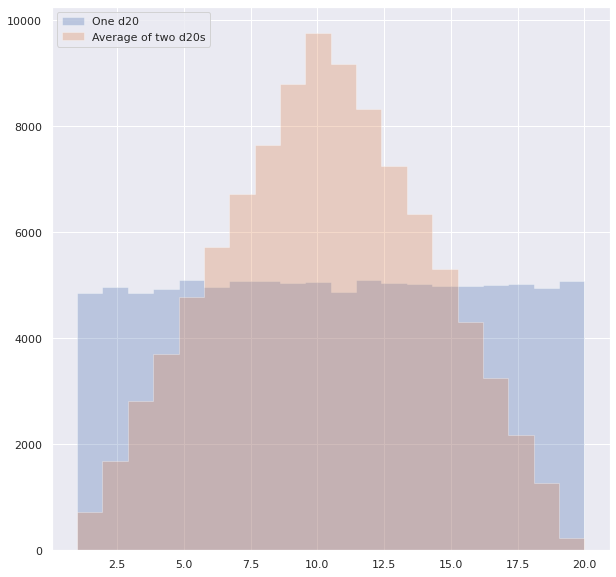

In [77]:
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)

plt.figure(figsize=(10,10))
plt.hist(two_d20['die_1'], **kwargs, label='One d20')
plt.hist(two_d20['trunc_avg'], **kwargs, label='Average of two d20s')

plt.legend(loc='upper left')
plt.show()

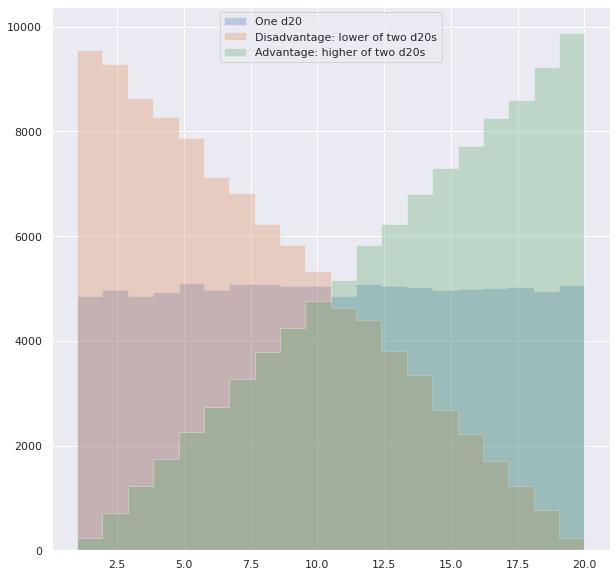

In [66]:
plt.figure(figsize=(10,10))

plt.hist(two_d20['die_1'], **kwargs, label='One d20')
plt.hist(two_d20['disadvantage'], **kwargs, label='Disadvantage: lower of two d20s')
plt.hist(two_d20['advantage'], **kwargs, label='Advantage: higher of two d20s')

plt.legend(loc='upper center')
plt.show()

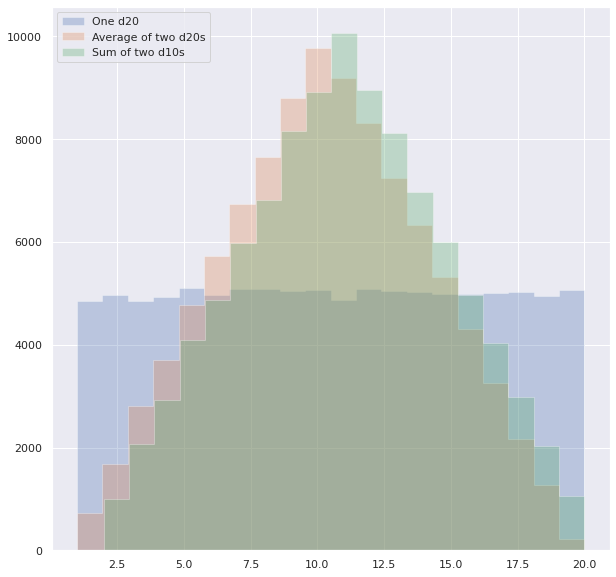

In [67]:
plt.figure(figsize=(10,10))

plt.hist(two_d20['die_1'], **kwargs, label='One d20')
plt.hist(two_d20['trunc_avg'], **kwargs, label='Average of two d20s')
plt.hist(two_d10['sum'], histtype='stepfilled', alpha=0.3, bins=19, label='Sum of two d10s')

plt.legend(loc='upper left')
plt.show()